In [1]:
import datetime

import pandas as pd

import matplotlib as mpl

In [2]:
%matplotlib inline
mpl.style.use('classic')

# Clean PISCES data

PISCE: https://academic.oup.com/bioinformatics/article/19/12/1589/258419

In [3]:
pisces_df = pd.read_csv('./raw_data/cullpdb_pc25_res2.0_R0.25_d180531_chains9099.gz',  sep=r'[\t ]+', engine='python')

In [4]:
pisces_df.head(2)

,IDs,length,Exptl.,resolution,R-factor,FreeRvalue
0,1A12C,413,XRAY,1.7,0.19,0.22
1,1A1XA,108,XRAY,2.0,0.21,0.25


In [5]:
pisces_df.shape

(9099, 6)

In [6]:
# make sure IDs values are all unique
assert pisces_df.IDs.unique().shape[0] == pisces_df.shape[0]

In [7]:
%%time
# For explanantion of chain code: http://dunbrack.fccc.edu/Guoli/pisces_download.php
pdb_id_chain_ids = pisces_df.IDs.apply(
    lambda s: pd.Series([s, s[:4], s[4]], index=['IDs', 'pdb_id', 'chain_code']))

CPU times: user 2.83 s, sys: 118 ms, total: 2.95 s
Wall time: 2.95 s


In [8]:
pdb_id_chain_ids.head()

,IDs,pdb_id,chain_code
0,1A12C,1A12,C
1,1A1XA,1A1X,A
2,1A62A,1A62,A
3,1A73A,1A73,A
4,1A8LA,1A8L,A


In [9]:
# replaced IDs column with (pdb_id, chain_code) columns
out_df = pisces_df.merge(pdb_id_chain_ids, on='IDs').drop('IDs', axis=1)

In [10]:
out_df.head()

,length,Exptl.,resolution,R-factor,FreeRvalue,pdb_id,chain_code
0,413,XRAY,1.70,0.19,0.22,1A12,C
1,108,XRAY,2.00,0.21,0.25,1A1X,A
2,130,XRAY,1.55,0.22,0.25,1A62,A
3,163,XRAY,1.80,0.21,0.30,1A73,A
4,226,XRAY,1.90,0.19,0.22,1A8L,A


# Intersect with pdb

In [11]:
datestamp = str(datetime.datetime.today().date())
datestamp

'2018-06-06'

In [12]:
%%time
adf = pd.read_csv('./{0}-ss.cleaned.csv'.format(datestamp), dtype=str)

CPU times: user 3.74 s, sys: 282 ms, total: 4.02 s
Wall time: 5.94 s


In [13]:
adf['len'] = adf['len'].astype(int)

In [14]:
adf.shape

(393732, 7)

In [15]:
adf.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
4,1B2H,B,KAK,CBC,CEC,3,False


In [16]:
%time bdf = adf.merge(out_df, on=['pdb_id', 'chain_code'])

CPU times: user 165 ms, sys: 7.2 ms, total: 172 ms
Wall time: 134 ms


In [17]:
bdf.shape

(9078, 12)

In [18]:
bdf.head(2)

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,length,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,20,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,20,XRAY,1.85,0.20,0.24


In [19]:
bdf.describe()

,len,length,resolution,R-factor,FreeRvalue
count,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,243.168539,243.168319,1.614917,0.176362,0.213723
std,156.566596,156.566558,0.281776,0.029329,0.081340
min,20.000000,20.000000,0.480000,0.070000,0.080000
25%,132.000000,132.000000,1.440000,0.160000,0.180000
50%,208.000000,208.000000,1.650000,0.180000,0.210000
75%,323.000000,323.000000,1.850000,0.200000,0.230000
max,1632.000000,1632.000000,2.000000,0.250000,1.000000


In [20]:
bdf.query('len != length')

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,length,Exptl.,resolution,R-factor,FreeRvalue
5905,5LTR,A,MRGSHHHHHHGMASMTGGQQMGRDLYDDDDKDPLEMVSKGEEDNMA...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTT...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,271,False,269,XRAY,1.21,0.16,0.18


Verified that the `ss.txt.gz` from pdb is more update-to-date (see [fasta](https://www.rcsb.org/pdb/download/viewFastaFiles.do?structureIdList=5LTR&compressionType=uncompressed)), so drop `length` column

In [21]:
bdf.drop('length', axis=1, inplace=True)

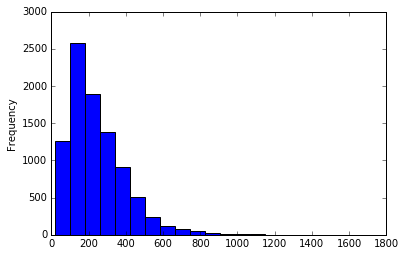

In [22]:
bdf.len.plot.hist(bins=20)

In [23]:
bdf.head(2)

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24


# Get a sense of sst distribution

In [24]:
sst8_sr = pd.Series(list(''.join(bdf.sst8.values.tolist())))

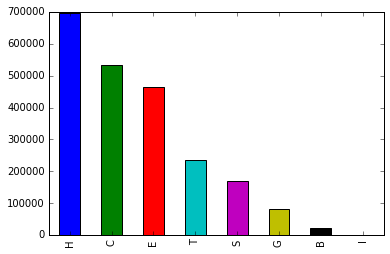

In [25]:
sst8_sr.value_counts().plot.bar()

In [26]:
sst3_sr = pd.Series(list(''.join(bdf.sst3.values.tolist())))

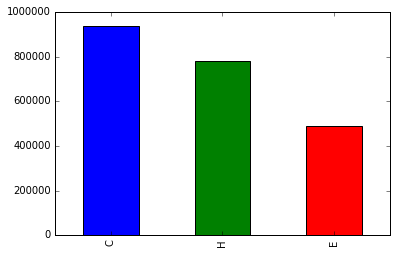

In [27]:
sst3_sr.value_counts().plot.bar()

# Get a sense of aa distribution

In [28]:
aa_sr = sst_sr = pd.Series(list(''.join(bdf.seq.values.tolist())))

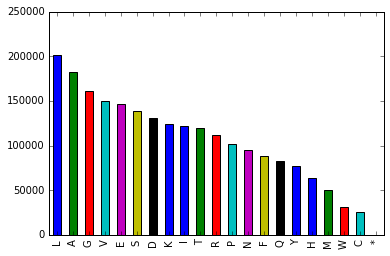

In [29]:
aa_sr.value_counts().plot.bar()

In [30]:
bdf.to_csv('./{0}-pdb-intersect-pisces.csv'.format(datestamp), index=False)